[*********************100%***********************]  1 of 1 completed

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Backtesting Results for TSLA (2022-01-01 to 2024-01-01):
MAE: 19.99, RMSE: 24.28, MAPE: 8.67%, R²: 0.7853


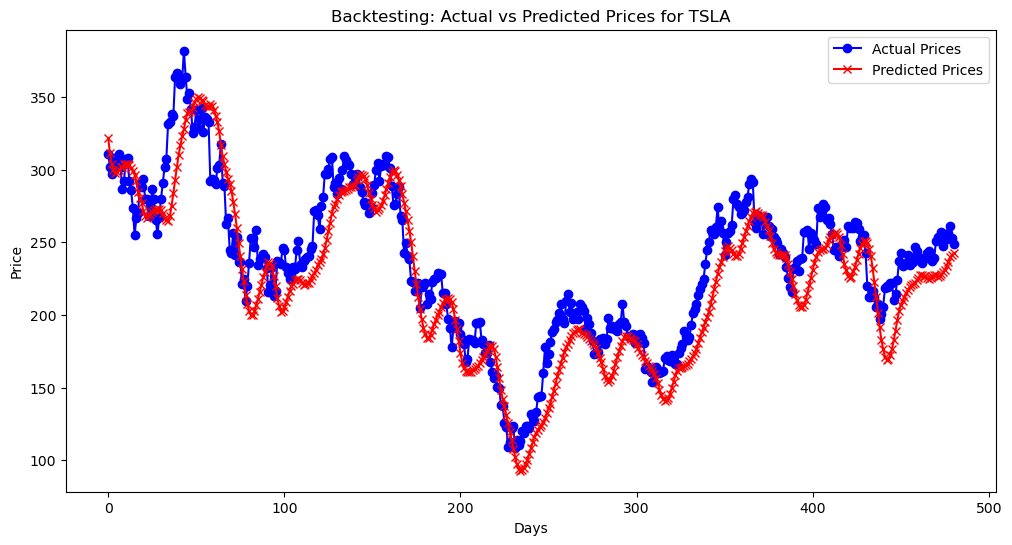

[*********************100%***********************]  1 of 1 completed


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Backtesting Results for MSFT (2022-01-01 to 2024-01-01):
MAE: 9.21, RMSE: 10.95, MAPE: 3.29%, R²: 0.9321


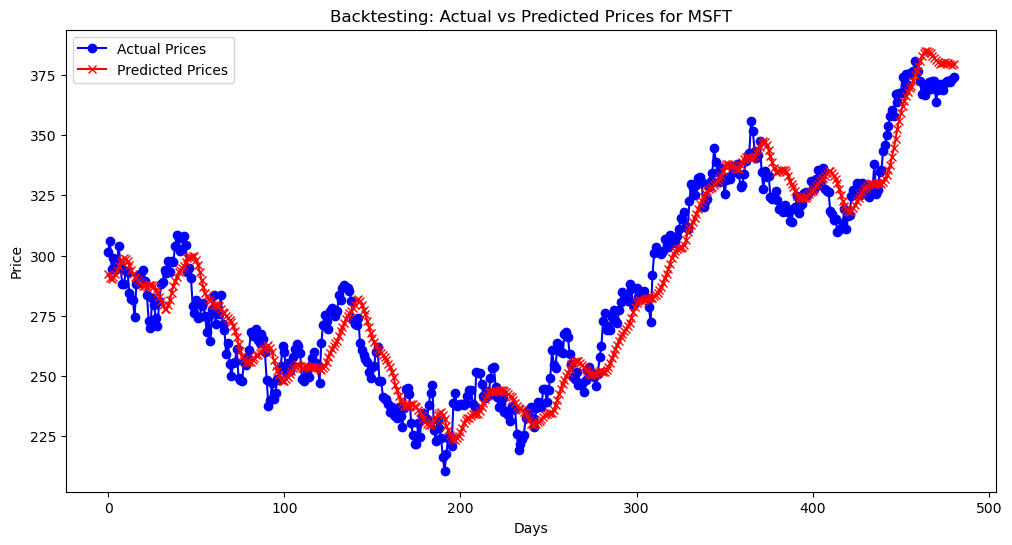

[*********************100%***********************]  1 of 1 completed


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Backtesting Results for KO (2022-01-01 to 2024-01-01):
MAE: 0.91, RMSE: 1.15, MAPE: 1.59%, R²: 0.7418


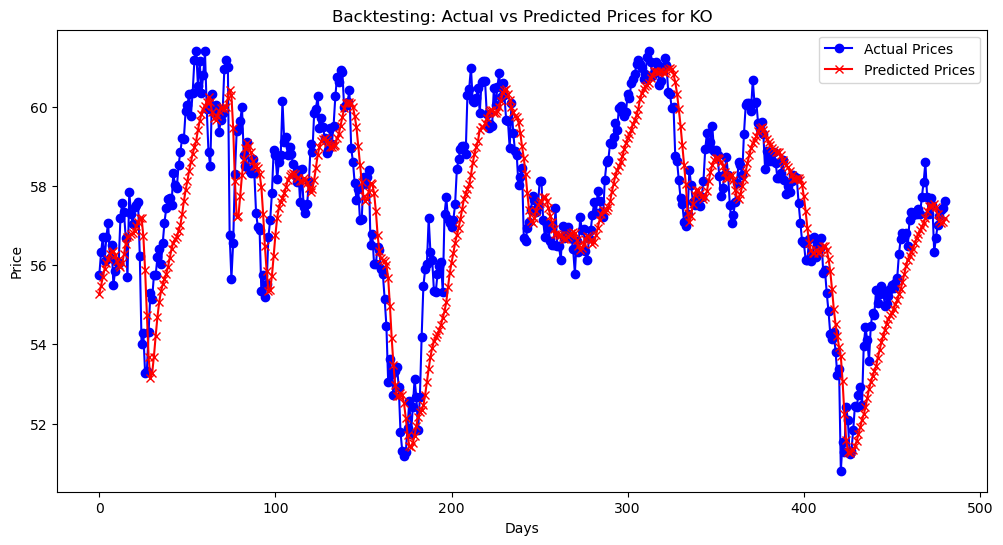

In [5]:
import sys
import os

# Get the absolute path to the `src` directory
src_path = os.path.abspath(os.path.join('..', 'src'))

# Add the `src` directory to the Python path
if src_path not in sys.path:
    sys.path.append(src_path)

import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model
from lstm_model import Attention
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from data_processing import fetch_stock_data, preprocess_data, create_lstm_input

# Define backtesting function
def backtest_lstm(ticker, model_path, start_date='2022-01-01', end_date='2024-01-01'):
    # Fetch and preprocess data
    data = fetch_stock_data(ticker, start_date=start_date, end_date=end_date)
    data, scaler = preprocess_data(data)

    # Prepare input data for backtesting
    X, y = create_lstm_input(data, target_column='Adj Close', lookback=20)

    # Load the saved LSTM model
    model = load_model(model_path, custom_objects={'Attention': Attention})

    # Generate predictions
    y_pred = model.predict(X)

    # Inverse transform predictions and actual values to original scale
    y_test_padded = np.zeros((len(y), scaler.min_.shape[0]))
    y_pred_padded = np.zeros((len(y_pred), scaler.min_.shape[0]))
    y_test_padded[:, 0] = y.flatten()
    y_pred_padded[:, 0] = y_pred.flatten()
    
    y_actual = scaler.inverse_transform(y_test_padded)[:, 0]
    y_predicted = scaler.inverse_transform(y_pred_padded)[:, 0]

    # Calculate metrics
    mae = mean_absolute_error(y_actual, y_predicted)
    rmse = np.sqrt(mean_squared_error(y_actual, y_predicted))
    mape = mean_absolute_percentage_error(y_actual, y_predicted)
    r2 = r2_score(y_actual, y_predicted)

    print(f"Backtesting Results for {ticker} ({start_date} to {end_date}):")
    print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}, MAPE: {mape * 100:.2f}%, R²: {r2:.4f}")

    # Plot actual vs predicted prices
    plt.figure(figsize=(12, 6))
    plt.plot(y_actual, label='Actual Prices', color='blue', marker='o')
    plt.plot(y_predicted, label='Predicted Prices', color='red', marker='x')
    plt.title(f'Backtesting: Actual vs Predicted Prices for {ticker}')
    plt.xlabel('Days')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

    return mae, rmse, mape, r2

# Backtest models
tickers = ['TSLA', 'MSFT', 'KO']
model_paths = ['lstm_TSLA_model.h5', 'lstm_MSFT_model.h5', 'lstm_KO_model.h5']

for ticker, model_path in zip(tickers, model_paths):
    backtest_lstm(ticker, model_path, start_date='2022-01-01', end_date='2024-01-01')

[*********************100%***********************]  1 of 1 completed


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Backtesting Results for TSLA (2022-01-01 to 2024-01-01):
MAE: 19.99, RMSE: 24.28, MAPE: 8.67%, R²: 0.7853
Total P/L: $-5279.61, Sharpe Ratio: -1.57, Max Drawdown: $-5302.89


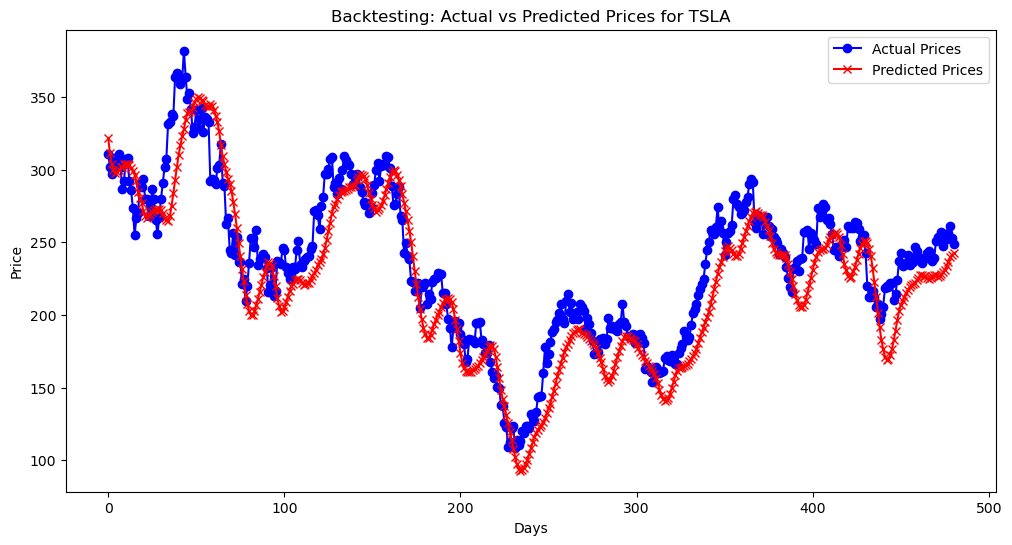

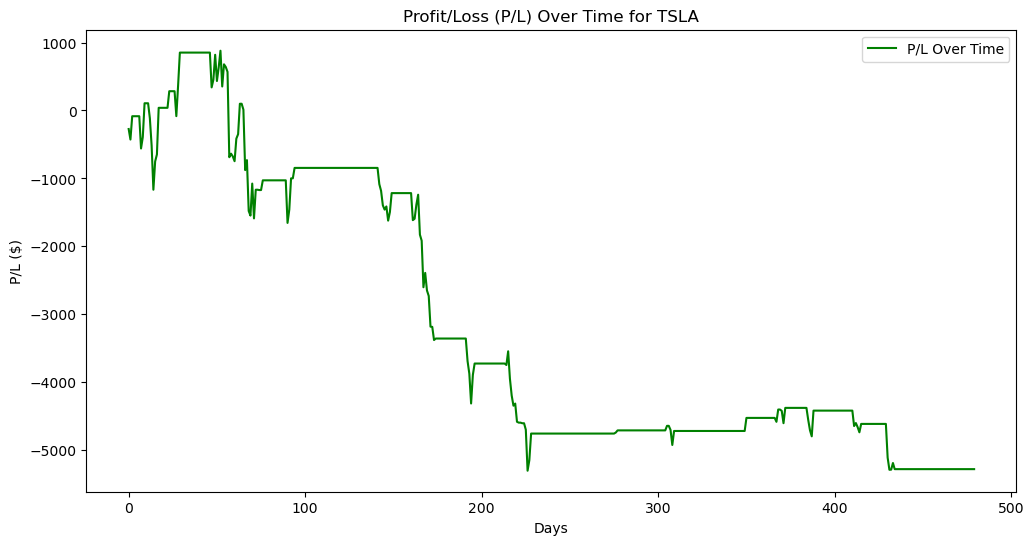

[*********************100%***********************]  1 of 1 completed


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Backtesting Results for MSFT (2022-01-01 to 2024-01-01):
MAE: 9.21, RMSE: 10.95, MAPE: 3.29%, R²: 0.9321
Total P/L: $5260.74, Sharpe Ratio: 0.85, Max Drawdown: $-1057.56


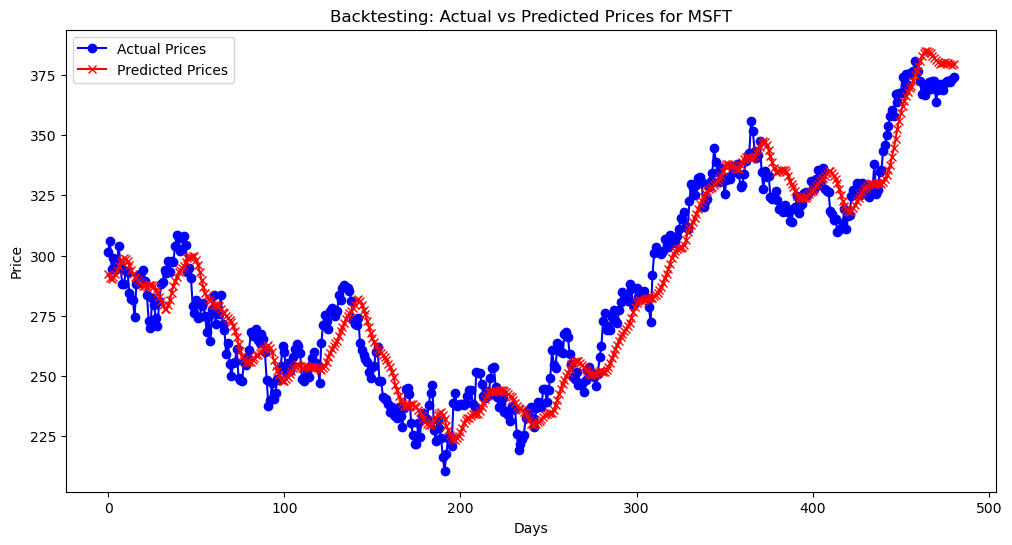

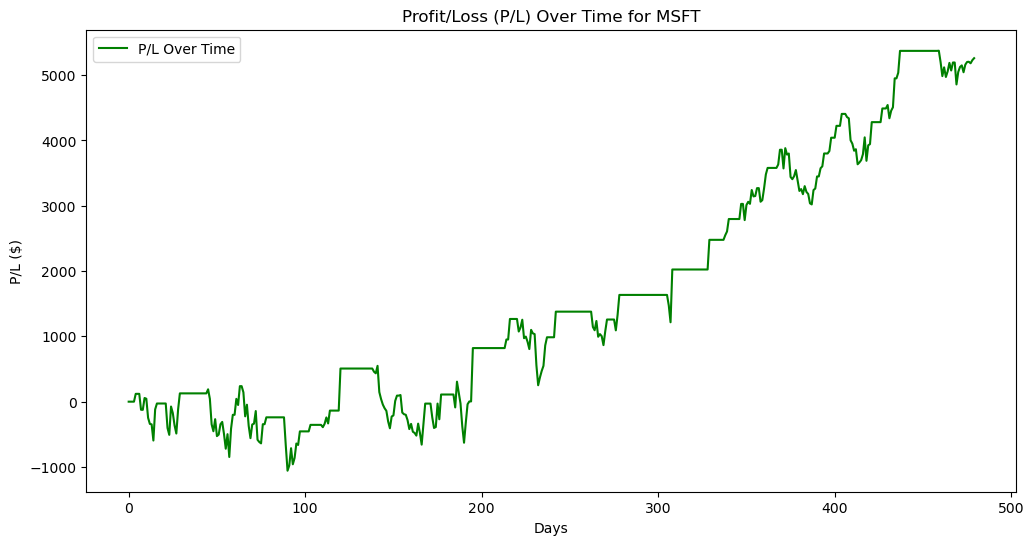

[*********************100%***********************]  1 of 1 completed


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Backtesting Results for KO (2022-01-01 to 2024-01-01):
MAE: 0.91, RMSE: 1.15, MAPE: 1.59%, R²: 0.7418
Total P/L: $-117.44, Sharpe Ratio: 0.94, Max Drawdown: $-553.02


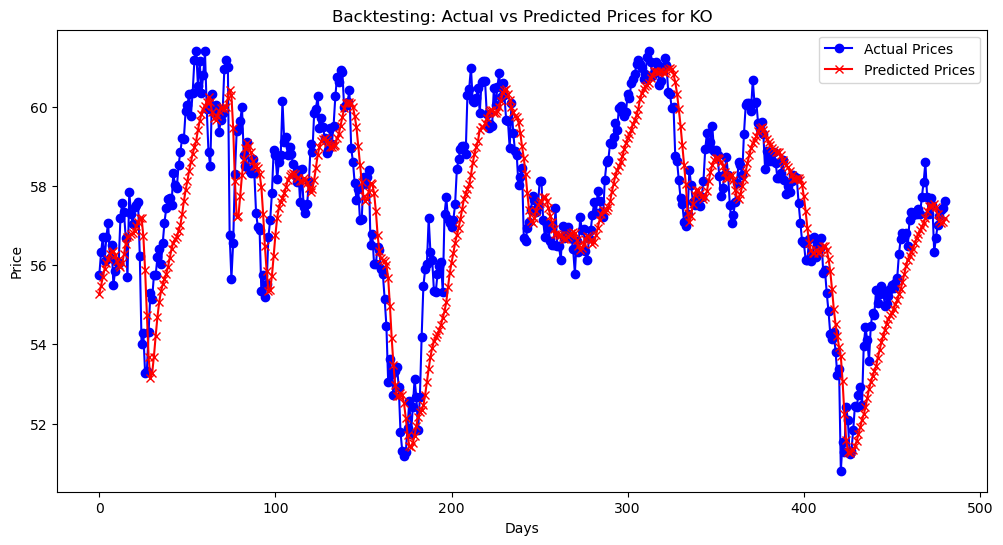

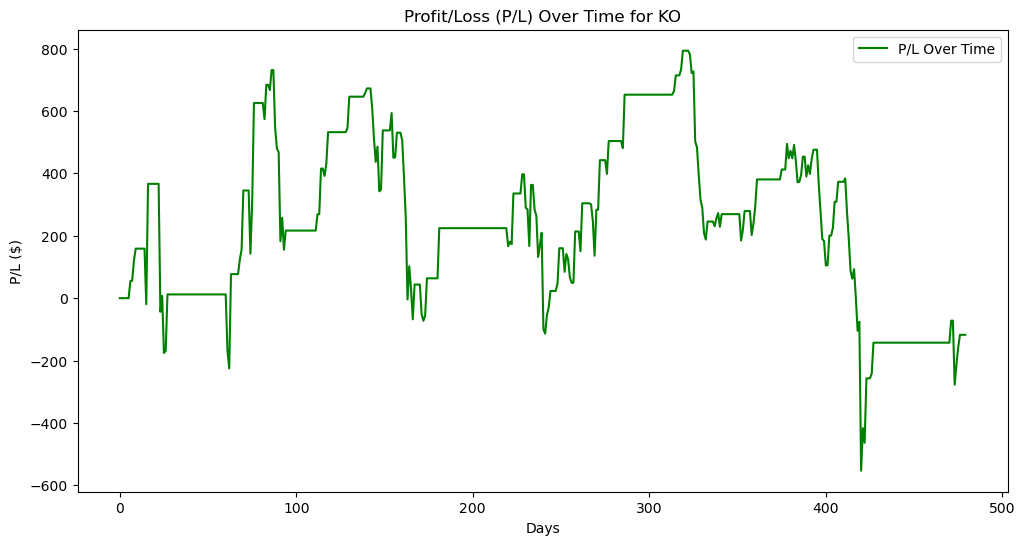

In [3]:
import sys
import os

# Get the absolute path to the `src` directory
src_path = os.path.abspath(os.path.join('..', 'src'))

# Add the `src` directory to the Python path
if src_path not in sys.path:
    sys.path.append(src_path)

import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model
from lstm_model import Attention
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from data_processing import fetch_stock_data, preprocess_data, create_lstm_input

# Define backtesting function with P/L
def backtest_lstm_with_pl(ticker, model_path, start_date='2022-01-01', end_date='2024-01-01', initial_cash=10000):
    # Fetch and preprocess data
    data = fetch_stock_data(ticker, start_date=start_date, end_date=end_date)
    data, scaler = preprocess_data(data)

    # Prepare input data for backtesting
    X, y = create_lstm_input(data, target_column='Adj Close', lookback=20)

    # Load the saved LSTM model
    model = load_model(model_path, custom_objects={'Attention': Attention})

    # Generate predictions
    y_pred = model.predict(X)

    # Inverse transform predictions and actual values to original scale
    y_test_padded = np.zeros((len(y), scaler.min_.shape[0]))
    y_pred_padded = np.zeros((len(y_pred), scaler.min_.shape[0]))
    y_test_padded[:, 0] = y.flatten()
    y_pred_padded[:, 0] = y_pred.flatten()
    
    y_actual = scaler.inverse_transform(y_test_padded)[:, 0]
    y_predicted = scaler.inverse_transform(y_pred_padded)[:, 0]

    # Calculate metrics
    mae = mean_absolute_error(y_actual, y_predicted)
    rmse = np.sqrt(mean_squared_error(y_actual, y_predicted))
    mape = mean_absolute_percentage_error(y_actual, y_predicted)
    r2 = r2_score(y_actual, y_predicted)

    # Initialize P/L tracking
    cash = initial_cash
    position = 0  # Number of shares held
    pl = []  # Track profit/loss over time
    trades = []  # Track trades

    for i in range(len(y_predicted) - 1):
        current_price = y_actual[i]
        next_price = y_actual[i + 1]

        # Simple trading strategy: Buy if predicted price is higher, Sell if lower
        if y_predicted[i + 1] > current_price:  # Predicts price will go up
            if position == 0:  # If not holding, buy
                position = cash // current_price  # Buy as many shares as possible
                cash -= position * current_price
                trades.append((i, 'Buy', current_price))
        elif y_predicted[i + 1] < current_price:  # Predicts price will go down
            if position > 0:  # If holding, sell
                cash += position * current_price
                position = 0  # Clear position
                trades.append((i, 'Sell', current_price))

        # Calculate portfolio value (cash + position value)
        portfolio_value = cash + position * next_price
        pl.append(portfolio_value - initial_cash)

    # Final sell at the last price if holding a position
    if position > 0:
        cash += position * y_actual[-1]
        position = 0
        trades.append((len(y_actual) - 1, 'Sell', y_actual[-1]))

    # Final P/L metrics
    total_pl = cash - initial_cash
    sharpe_ratio = np.mean(pl) / np.std(pl) if np.std(pl) > 0 else 0
    max_drawdown = min(pl)

    print(f"Backtesting Results for {ticker} ({start_date} to {end_date}):")
    print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}, MAPE: {mape * 100:.2f}%, R²: {r2:.4f}")
    print(f"Total P/L: ${total_pl:.2f}, Sharpe Ratio: {sharpe_ratio:.2f}, Max Drawdown: ${max_drawdown:.2f}")

    # Plot actual vs predicted prices
    plt.figure(figsize=(12, 6))
    plt.plot(y_actual, label='Actual Prices', color='blue', marker='o')
    plt.plot(y_predicted, label='Predicted Prices', color='red', marker='x')
    plt.title(f'Backtesting: Actual vs Predicted Prices for {ticker}')
    plt.xlabel('Days')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

    # Plot P/L over time
    plt.figure(figsize=(12, 6))
    plt.plot(pl, label='P/L Over Time', color='green')
    plt.title(f'Profit/Loss (P/L) Over Time for {ticker}')
    plt.xlabel('Days')
    plt.ylabel('P/L ($)')
    plt.legend()
    plt.show()

    return mae, rmse, mape, r2, total_pl, sharpe_ratio, max_drawdown, trades

# Backtest models
tickers = ['TSLA', 'MSFT', 'KO']
model_paths = ['lstm_TSLA_model.h5', 'lstm_MSFT_model.h5', 'lstm_KO_model.h5']

for ticker, model_path in zip(tickers, model_paths):
    backtest_lstm_with_pl(ticker, model_path, start_date='2022-01-01', end_date='2024-01-01')
